# Proyecto Estadistica
Participantes:
* Diego Ramirez 202073534-4
* Daniel Sáez 202273613-5
* Patricio Leigh  202156522-1


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from scipy.optimize import minimize
import numpy as np
from scipy.special import gamma
from scipy.stats import truncnorm
from google.colab import drive
from scipy.stats import beta, t, chi2
from scipy.stats import linregress
from scipy.stats import t,norm,chisquare
import statsmodels.api as sm
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/My Drive/ColabNotebooks/new_dataset.csv")

Mounted at /content/drive


## Primera entrega

### Contexto

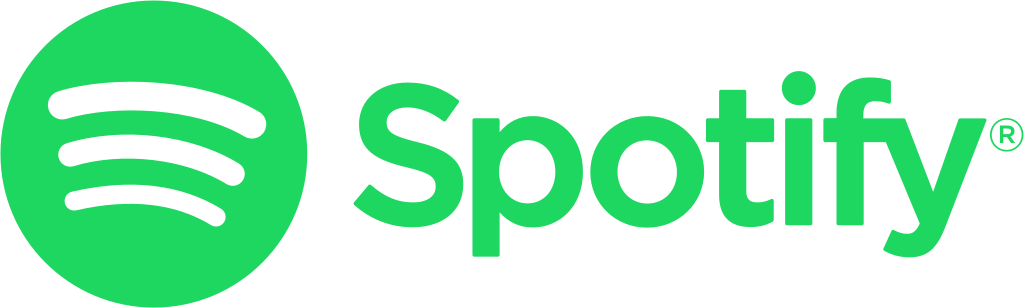

La música es una parte fundamental de la vida cotidiana para muchas personas alrededor del mundo. No solo refleja las preferencias individuales, sino que también puede ser un indicador poderoso de las tendencias culturales y sociales. Con el auge de los ultimos años de plataformas de streaming como Spotify, ahora tenemos acceso a una cantidad masiva de datos sobre que musica escuchan las personas en diferentes lugares del mundo.

En este proyecto, trabajaremos con un dataset que contiene los top 50 diarios de canciones más populares en 73 países. Estos datos abarcan un periodo desde 17 de octubre de 2023 hasta el 4 de abril de 2024.









### Hipótesis
¿Que tan popular es un artista en un continente y como si popularidad se ve reflejada en la felicidad de sus canciones y el tiempo que ha pasado desde que se estrenó su canción?

### Variables escojidas:
- **days_since_album_release**: Tiempo désde el lanzamiento de un albúm, hasta que este llegua al top 50.

- **popularity**: Popularidad del artista de la canción.

- **main_artist**: Artista principal en la canción.

- **continent**: Continente en el que la canción aparece en el top 50.

### Información del Dataset

In [ ]:
pd.set_option('display.max_columns', None)
df.describe(include='all')

,main_artist,feat_1,feat_2,spotify_id,name,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,days_since_album_release,duration_min,continent,past_week_rank
count,616617,246755,78041,616617,616617,616617.000000,616617.000000,616617.000000,616617,616617,616617.000000,616617.000000,616617.00000,616617,616617,616617.000000,616617.000000,616617,616617.000000,616617.000000,616617.000000,616617.000000,616617.000000,616617.000000,616617.000000,616617.000000,616617.000000,616617.000000,616617.000000,616617.000000,591246,616617.000000
unique,3918,2260,918,9031,8400,NaN,NaN,NaN,73,169,NaN,NaN,NaN,6417,1610,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN
top,Bad Bunny,Feid,Lily-Rose Depp,3rUGC1vUpkDG9CZFHMur1t,greedy,NaN,NaN,NaN,Dominican Republic,2024-03-16,NaN,NaN,NaN,nadie sabe lo que va a pasar mañana,2023-10-13,NaN,NaN,C#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe,NaN
freq,15708,8069,3582,6709,6709,NaN,NaN,NaN,8474,3941,NaN,NaN,NaN,13988,19875,NaN,NaN,78530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,244802,NaN
mean,NaN,NaN,NaN,NaN,NaN,25.477303,0.950866,2.982136,NaN,NaN,77.670340,0.356103,193554.29080,NaN,NaN,0.680686,0.647750,NaN,-6.551686,0.529406,0.097797,0.282871,0.016566,0.176064,0.536845,122.508609,3.892191,2020.826659,963.636462,3.225889,NaN,28.459439
std,NaN,NaN,NaN,NaN,NaN,14.426250,7.080435,12.254608,NaN,NaN,15.978724,0.478846,50382.66605,NaN,NaN,0.140186,0.163394,NaN,2.658516,0.499135,0.092189,0.258970,0.088864,0.129458,0.229466,28.522988,0.441654,7.915993,2890.668823,0.839650,NaN,16.210666
min,NaN,NaN,NaN,NaN,NaN,1.000000,-49.000000,-49.000000,NaN,NaN,0.000000,0.000000,33986.00000,NaN,NaN,0.000000,0.001890,NaN,-31.356000,0.000000,0.000000,0.000008,0.000000,0.015400,0.000000,0.000000,0.000000,1900.000000,-5.000000,0.570000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.000000,-1.000000,-3.000000,NaN,NaN,67.000000,0.000000,161948.00000,NaN,NaN,0.581000,0.545000,NaN,-7.931000,0.000000,0.039900,0.073900,0.000000,0.097700,0.360000,100.000000,4.000000,2022.000000,55.000000,2.700000,NaN,14.000000
50%,NaN,NaN,NaN,NaN,NaN,25.000000,0.000000,0.000000,NaN,NaN,82.000000,0.000000,186191.00000,NaN,NaN,0.699000,0.668000,NaN,-6.192000,1.000000,0.059000,0.188000,0.000001,0.121000,0.532000,120.000000,4.000000,2023.000000,146.000000,3.100000,NaN,28.000000
75%,NaN,NaN,NaN,NaN,NaN,38.000000,2.000000,5.000000,NaN,NaN,90.000000,1.000000,218400.00000,NaN,NaN,0.788000,0.762000,NaN,-4.775000,1.000000,0.115000,0.444000,0.000076,0.218000,0.724000,142.000000,4.000000,2023.000000,383.000000,3.640000,NaN,45.000000


<ipython-input-15-852a5385fae1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ocurrencias', y='continent', data=artistas_por_continente, palette='viridis')


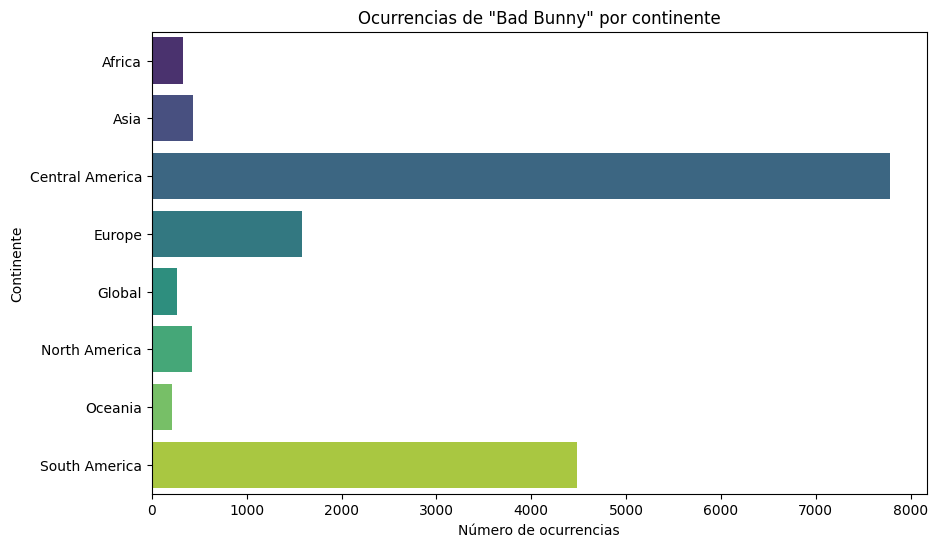

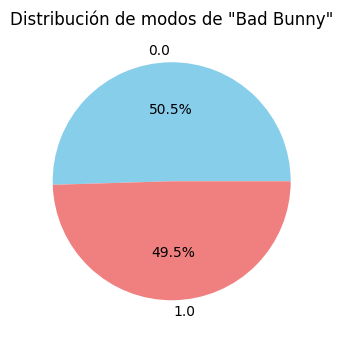

<ipython-input-15-852a5385fae1>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artist_data['days_since_album_release'] = (pd.to_datetime(artist_data['snapshot_date']) - pd.to_datetime(artist_data['album_release_date'])).dt.days


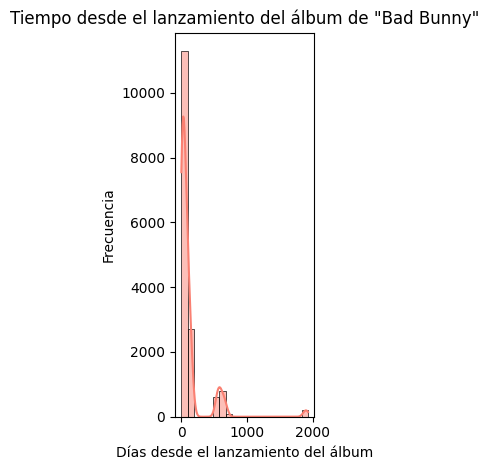

<ipython-input-15-852a5385fae1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ocurrencias', y='continent', data=artistas_por_continente, palette='viridis')


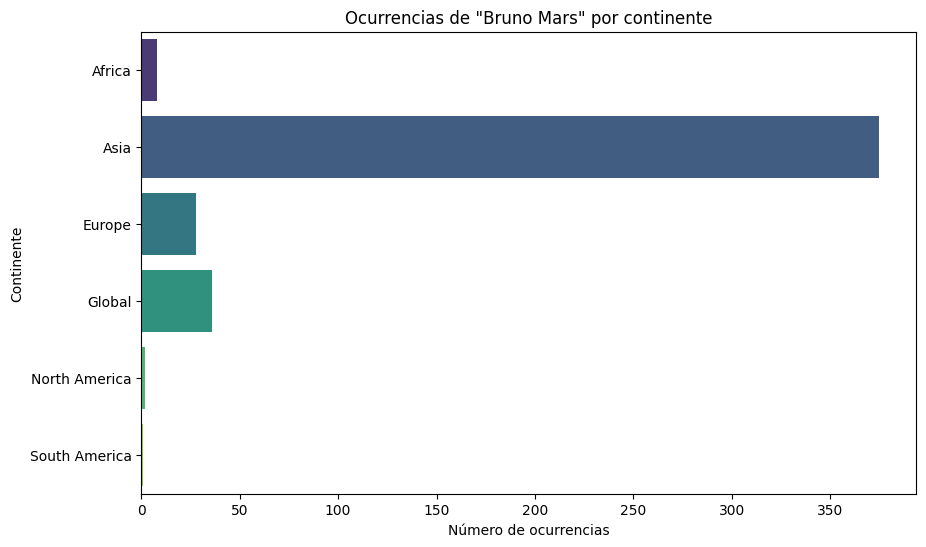

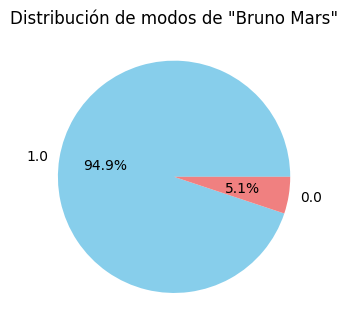

<ipython-input-15-852a5385fae1>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artist_data['days_since_album_release'] = (pd.to_datetime(artist_data['snapshot_date']) - pd.to_datetime(artist_data['album_release_date'])).dt.days


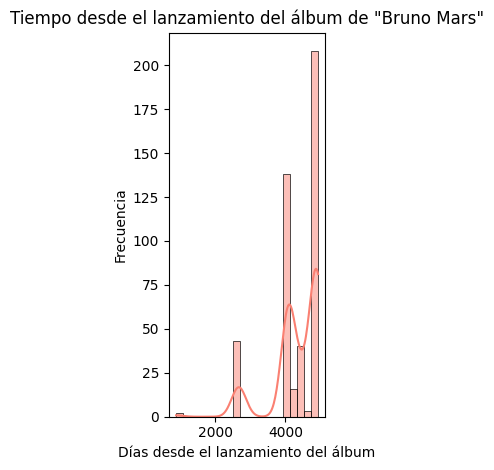

In [ ]:
def info_artistas(artist_name):
    # Filtrar el DataFrame para obtener solo las filas correspondientes al artista seleccionado
    artist_data = df[df['main_artist'] == artist_name]

    # Agrupar por continente y contar el número de ocurrencias del artista seleccionado en cada continente
    artistas_por_continente = artist_data.groupby('continent').size().reset_index(name='ocurrencias')

    # Crear el gráfico utilizando seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x='ocurrencias', y='continent', data=artistas_por_continente, palette='viridis')
    plt.title(f'Ocurrencias de "{artist_name}" por continente')
    plt.xlabel('Número de ocurrencias')
    plt.ylabel('Continente')
    plt.show()

    # Graficar la distribución de modos de las canciones del artista seleccionado
    plt.subplot(1, 2, 2)
    artist_modes = artist_data['mode'].value_counts()
    artist_modes.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
    plt.title(f'Distribución de modos de "{artist_name}"')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

   # Calcular el tiempo transcurrido desde el lanzamiento del álbum hasta la fecha de captura de datos
    artist_data['days_since_album_release'] = (pd.to_datetime(artist_data['snapshot_date']) - pd.to_datetime(artist_data['album_release_date'])).dt.days

    # Graficar el histograma del tiempo transcurrido
    plt.subplot(1, 3, 3)
    sns.histplot(artist_data['days_since_album_release'], bins=20, kde=True, color='salmon')
    plt.title(f'Tiempo desde el lanzamiento del álbum de "{artist_name}"')
    plt.xlabel('Días desde el lanzamiento del álbum')
    plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

# Obtener la lista de artistas únicos en el DataFrame
artistas_unicos = df['main_artist'].unique()


artista_elegido1 = 33
artista_elegido2 = 327

artist_name1 = artistas_unicos[artista_elegido1]
info_artistas(artist_name1)

artist_name2 = artistas_unicos[artista_elegido2]
info_artistas(artist_name2)


## Segunda Entrega y Tercera Entrega

### Preguntas Segunda Entrega

1. ¿Que suposiciones haces al usar cada metodo de estimacion?

Para el metodo de maxima verosimilitud asumimos que los datos con independientes e identicamente dsitribuidos y para el de momentos asumimos que la distribucion elegida es la distribucion que siguen los datos empiricos.

2. ¿Cuales son las limitaciones de los metodos de maxima verosimilitud y de los
momentos en la practica?

Las limitaciones que se presentan en el metodo de maxima verosimilitud es que en este metodo se requiere que los datos sigan la distribucion de probabilidad que se plantea, si esta no coincide las estimaciones de los parametros puedes ser sesgadas o inadecuadas, tambien los valores atipicos o extremos pueden tener un impacto significativo, tambien para usar maxima verosimilitud hay que tener una cantidad importante de datos para poder obtener estimaciones precisas y confiables. Por otro lado para el metodo de los momentos ....

3. ¿Como podrias aplicar el modelo ajustado para hacer predicciones o inferencias sobre una nueva muestra de datos?

Podriamos usar intervalos de confianza respecto a este modelo con los nuevos datos para estimar ciertos valores. Sin embargo, como el modelo obtenido funciona para la muestra desde que se trabajo, creemos que si la nueva muestra no sigue patrones similares al de la base nos puede señalar a usar otra distribución.

4. ¿Que implicaciones tienen los parametros estimados en el contexto del problema real que modela el dataset?

Las implicaciones de la media y la desviacion estandar son importantes, ya que proporcionan informacion crucial sobre la naturaleza y las caracteristicas de los datos, la media nos indicara el nivel promedio de popularity y la desviacion estandar la dispercion de los datos alrededor de la media. Estas variables nos ayudaran a hacer prediccciones sobre futuros datos ademas de la tendencia y variabiliad de estos.

5. ¿De que forma se puede validar los resultados que no sea de forma grafica?

Se puede hacer un analisis residual, donde se calcula la diferencia entre los valores observados y los predichos por el modelo y se verifica si estos diguen una distribucion normal con media cero y varianza constante.


### ***Modelamiento para Tiempo Desde Lanzamiento***

Para la variable Tiempo désde el lanzamiento de un albúm, para modelar su distribución se escogió una distribución de la familia Weibull, es decir $X \sim Weibull(\alpha,\beta)$, principalmente por su capacidad de presentar skewness (asímetria) a comparación de otras, aunque no es la única que puede, debido que esta característica se presenta en la variable en muchos artistas y su flexividad al momento de hacer curvas.

El desarrollo que se siguio para calcular sus estimadores es el siguiente:

sea f la f.d.p. de la variable X (Tiempo désde el lanzamiento de un albúm) $⇒$

$$\alpha > 0 \land \beta > 0$$

$$X \sim Weibull(\alpha,\beta) ⇒ f(x) = \frac{α}{β^{α}}x^{\alpha - 1}e^{-\frac{x}{β}}$$

$⇒$

$$E[X] = \beta Γ(1 + \frac{1}{\alpha})$$

$\land$

$$Var[X] = \beta^2(\Gamma(1 + \frac{2}{\alpha}) - \Gamma(1 + \frac{1}{\alpha})^2)$$
$$E[X^2] - E[X]^2 = \beta^2(\Gamma(1 + \frac{2}{\alpha}) - \Gamma(1 + \frac{1}{\alpha})^2)$$

$$E[X^2] = \beta^2(\Gamma(1 + \frac{2}{\alpha}) - \Gamma(1 + \frac{1}{\alpha})^2) + E[X]^2$$

$$E[X^2] = \beta^2(\Gamma(1 + \frac{2}{\alpha}) - \Gamma(1 + \frac{1}{\alpha})^2 + \Gamma(1 + \frac{1}{\alpha})^2)$$

$$E[X^2] = \beta^2(\Gamma(1 + \frac{2}{\alpha}))$$

$⇒$

$$E[X] = \beta\Gamma(1 + \frac{1}{\alpha})$$

$$E[X^2] = \beta^2\Gamma(1 + \frac{2}{\alpha})$$

$⇒$

$$\beta = \frac{E[X]}{\Gamma(1 + \frac{1}{\alpha})}$$

$⇒$

$$\frac{E[X^2]}{E[X]^2} = \frac{\Gamma(1 + \frac{2}{\alpha})}{\Gamma(1 + \frac{1}{\alpha})^2}$$

Notar que la función $$g(\alpha) = \frac{\Gamma(1 + \frac{2}{\alpha})}{\Gamma(1 + \frac{1}{\alpha})^2}$$ es una función biyecctiva en $]0,∞[$ y que $\alpha > 0 \land \beta > 0$

$\alpha$ se despeja ocupando métodos númericos para cada artista, y posteriormete se calcula $\beta$:

$$\beta = \frac{E[X]}{\Gamma(1 + \frac{1}{\alpha})}$$

Recordemos que:
$$E[X^2] = \frac{1}{n}\sum_{i = 1}^nx_i^2$$
y
$$E[X] = \frac{1}{n}\sum_{i = 1}^nx_i$$

La obtener el estimador por el método de máxima verosimilitud se hizo lo siguiente:
$$L(\alpha,\beta) = \prod_{i = 1}^n \frac{α}{β^{α}}x_i^{\alpha - 1}e^{-\frac{x_i}{β}}$$
$$ln(L(\alpha,\beta)) = ln(\prod_{i = 1}^n \frac{α}{β^{α}}x_i^{\alpha - 1}e^{-\frac{x_i}{β}})$$
$$ln(L(\alpha,\beta)) = \sum_{i = 1}^n ln(\frac{α}{β^{α}}x_i^{\alpha - 1}e^{-\frac{x_i}{β}})$$
$$\nabla ln(L(\alpha,\beta)) = (n(\frac{1}{\alpha} - ln(\beta)) + ln(\prod_{i = 1}^nx_i)\frac{1}{\beta^\alpha}\sum_{i = 0}^nx_i^\alpha(ln(\beta) - ln(x_i)),\frac{\alpha}{\beta}(-n + \frac{1}{\beta^\alpha}\sum_{i = 1}^nx_i^\alpha))$$
Posteriormente se igualo a 0:

$$\nabla ln(L(\alpha,\beta)) = 0$$

Para poder encontrar puntos críticos, se obtiene un sistema de ecuaciones que se resuelve utilizando métodos númericos, también se ocupa métodos númericos para calcular si es un máximo o un mínimo, de esta manera finalmente se logra despejar el estimador para cuando hay máxima verosimilitud.

En ambos métodos para esta variable "Tiempo désde el lanzamiento de un albúm" se hace para un artista en partícular para ver su respectivo $\alpha$ y $\beta$ ejecutar el programa para ese artísta en partícular.

Para el artista número 892:

<ipython-input-24-73995fecf322>:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artist_data['days_since_album_release'] = (pd.to_datetime(artist_data['snapshot_date']) - pd.to_datetime(artist_data['album_release_date'])).dt.days


Total de lanzamientos: 482


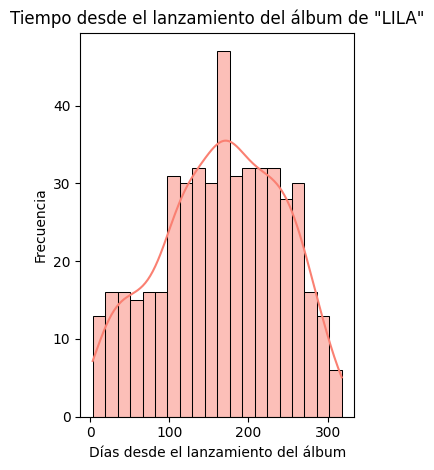

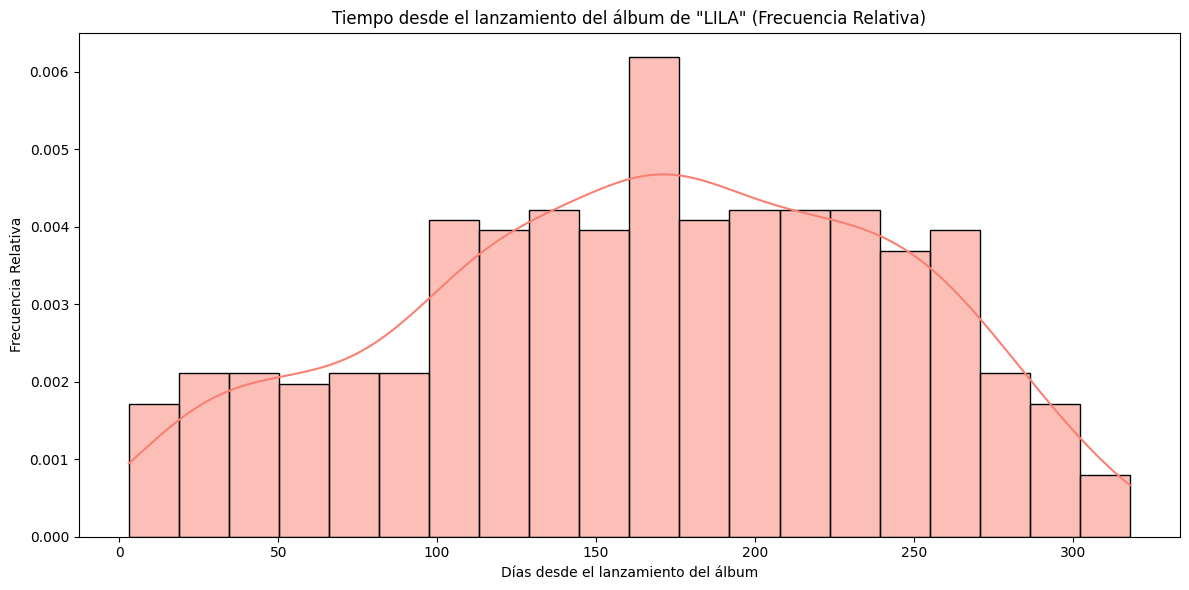

f.d.p por método de momentos:
Estimación de alpha: 2.3272336815852523
Estimación de beta: 186.88116538328055


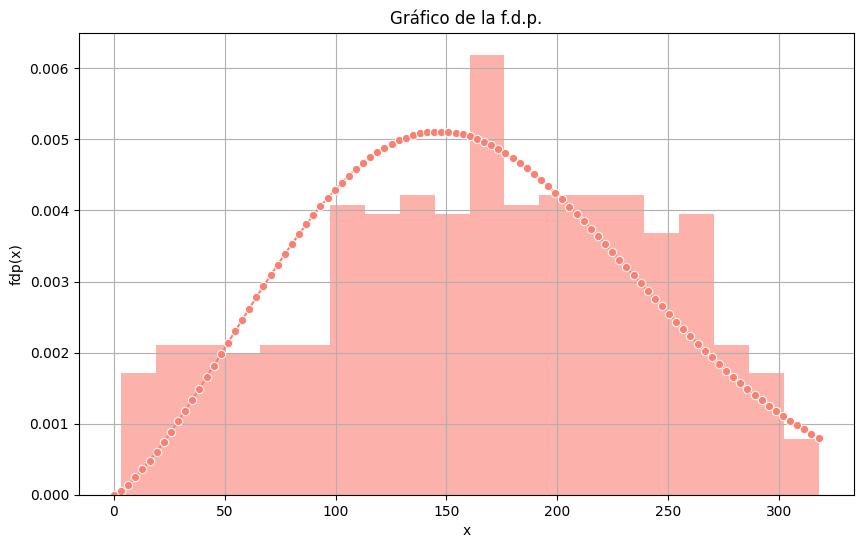

f.d.p por método de máxima verosimilitud:
Estimación de alpha: 2.265142382055137
Estimación de beta: 185.47819748155197


<Figure size 640x480 with 0 Axes>

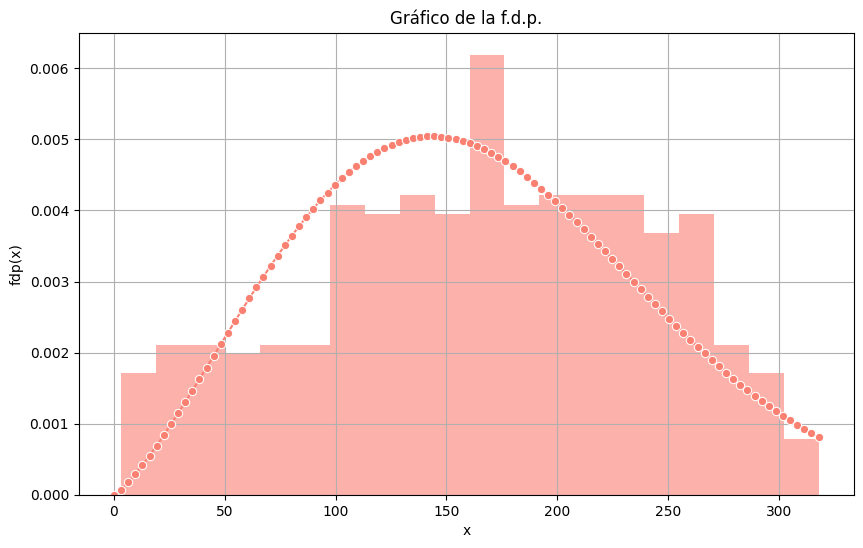


Estimación por método de máxima verosimilitud:
Estimación de alpha: 2.265142382055137
Estimación de beta: 185.47819748155197

Por metodos de momentos:

E[X] = 165.5850622406639
Var[X] = 5707.437785162107 

Por metodos de máxima verosimilitud:

E[X] = 165.5850622406639
Var[X] = 5707.437785162107 



In [ ]:
def faux1(x):
    if x == 0:
        x = 0.1
    return gamma(1 + 2/x)/(gamma(1 + 1/x)**2)

'''
def faux2(x,l):
  n = len(l)
  s1 = 0
  i = 0
  while i < n:
    s1 += l[i]**x
    i += 1
  if math.log(x) == 0:
    x += 0.01
  b = (1/math.log(x))*(math.log(s1) - math.log(n))
  if b <= 0:
    return -1
  s2 = 0
  i = 0
  while i < n:
    s2 += (l[i]**x)*(math.log(b) - math.log(l[i]))
    i += 1
  p1 = 1
  i = 0
  while i < n:
    p1 *= l[i]
    i += 1
  return n*((1/x) - math.log(b)) + math.log(p1) + (1/(b**x))*s2
'''
#la función retorna la función inversa evaluada en v aproximadamente, en el primer intervalo donde detecté su inversa
def aproximacion_inversa(f,v,iteraciones,minimo,maximo):
    c1 = minimo
    c2 = maximo
    e = 0
    p = 0
    i = 0
    while i < iteraciones:
        #print("[",c1,c2,"] [",f(c1),f(c2),"]")
        e = (c2 - c1)/2
        p = (c1 + c2)/2
        e1 = p - e/2
        e2 = p + e/2
        a = 0
        b = 0
        if f(e1) == v:
            return (e1,0)
        if f(e2) == v:
            return (e2,0)
        if f(e2) < f(e1):
            a = v
            b = f(e1)
        elif f(e1) <= f(e2):
            a = f(e1)
            b = v
        if a <= b:
            c1 = e1
        elif f(e1) == v:
            return (e1,0)
        if f(e2) < f(e1):
            b = f(e2)
        elif f(e1) < f(e2):
            a = f(e2)
        if a > b:
            c2 = e2
        elif f(e2) == v:
            return (e2,0)
        if f(e1) == f(e2) and f(e1) == v:
            return (e1,0)
        i += 1
    return (p,e)

def fdp(x,a,b):
    return (a/(b**a))*(x**(a-1))*(math.e**(-((x/b)**a)))

# Función de log-verosimilitud negativa (para minimización)
def neg_log_likelihood(params, data):
  beta, alpha = params
  n = len(data)
  term1 = n * math.log(beta) - n * beta * math.log(alpha)
  term2 = (beta - 1) * np.sum(np.log(data))
  term3 = - np.sum((data / alpha) ** beta)
  return -(term1 + term2 + term3)

def EWeibull(a,b):
  return b*gamma(1 + 1/a)

def VarWeibull(a,b):
  return b**2*(gamma(1 + 2/a) - gamma(1 + 1/a)**2)

def info_artistas_por_continente(artist_name):
    # Filtrar el DataFrame para obtener solo las filas correspondientes al artista seleccionado
    artist_data = df[df['main_artist'] == artist_name]

    '''
    # Agrupar por continente y contar el número de ocurrencias del artista seleccionado en cada continente
    artistas_por_continente = artist_data.groupby('continent').size().reset_index(name='ocurrencias')

    # Crear el gráfico de barras para las ocurrencias de artistas por continente
    plt.figure(figsize=(24, 8))
    plt.subplot(1, 2, 1)
    sns.barplot(x='continent', y='ocurrencias', data=artistas_por_continente, palette='viridis')
    plt.title(f'Ocurrencias de "{artist_name}" por continente')
    plt.xlabel('Continente')
    plt.ylabel('Número de ocurrencias')

    # Obtener la distribución de modos de las canciones del artista por continente
    mode_distribution = artist_data.groupby(['continent', 'mode']).size().unstack(fill_value=0)

     # Calcular los porcentajes de cada modo por continente
    mode_percentages = mode_distribution.div(mode_distribution.sum(axis=1), axis=0) * 100
    mode_percentages = mode_percentages.reset_index().melt(id_vars='continent', value_vars=[0, 1], var_name='mode', value_name='percentage')
    '''


    # Calcular el tiempo transcurrido desde el lanzamiento del álbum hasta la fecha de captura de datos
    artist_data['days_since_album_release'] = (pd.to_datetime(artist_data['snapshot_date']) - pd.to_datetime(artist_data['album_release_date'])).dt.days

    # Graficar el histograma del tiempo transcurrido
    plt.subplot(1, 2, 2)
    sns.histplot(artist_data['days_since_album_release'], bins=20, kde=True, color='salmon')
    plt.title(f'Tiempo desde el lanzamiento del álbum de "{artist_name}"')
    plt.xlabel('Días desde el lanzamiento del álbum')
    plt.ylabel('Frecuencia')

    plt.tight_layout()

    '''
    # Visualizar la distribución de modos de las canciones del artista seleccionado por continente
    plt.figure(figsize=(15, 8))
    sns.barplot(data=mode_percentages, x='continent', y='percentage', hue='mode', palette={0: 'red', 1: 'blue'})
    plt.title(f'Distribución porcentual de modos de canciones de "{artist_name}" por continente')
    plt.xlabel('Continente')
    plt.ylabel('Porcentaje de canciones')
    plt.xticks(rotation=45)
    plt.legend(title='Modo', labels=['0', '1'])
    plt.show()
    '''

    # Obtener el total de lanzamientos del artista
    total_lanzamientos = artist_data['album_release_date'].count()
    print(f'Total de lanzamientos: {total_lanzamientos}')

    # Crear un histograma de frecuencias relativas
    plt.figure(figsize=(12, 6))
    sns.histplot(artist_data['days_since_album_release'], bins=20, kde=True, color='salmon', stat='density')

    # Configurar el título y las etiquetas del gráfico
    plt.title(f'Tiempo desde el lanzamiento del álbum de "{artist_name}" (Frecuencia Relativa)')
    plt.xlabel('Días desde el lanzamiento del álbum')
    plt.ylabel('Frecuencia Relativa')

    plt.tight_layout()
    plt.show()

    a = aproximacion_inversa(faux1,(artist_data['days_since_album_release']**2).mean()/artist_data['days_since_album_release'].mean()**2,1000,0.1,20)[0]
    b = artist_data['days_since_album_release'].mean()/gamma(1 + 1/a)

    print('f.d.p por método de momentos:')
    print(f'Estimación de alpha: {a}')
    print(f'Estimación de beta: {b}')

    # Generar datos
    x_values = np.linspace(0.01, (pd.to_datetime(artist_data['snapshot_date']) - pd.to_datetime(artist_data['album_release_date'])).dt.days.max(), 100)
    data = pd.DataFrame({'x': x_values})

    # Evaluar la función
    data['y'] = data['x'].apply(lambda x: fdp(x,a,b))

    # Graficar la función
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='x', y='y', marker='o', color='salmon')
    plt.hist(artist_data['days_since_album_release'], bins=20, density=True, alpha=0.6,color='salmon', label='Datos de tiempo desde el lanzamiento del álbum')
    plt.title('Gráfico de la f.d.p.')
    plt.xlabel('x')
    plt.ylabel('fdp(x)')
    plt.grid(True)
    plt.show()

    # Datos
    datos = artist_data['days_since_album_release']

    # Valores iniciales para alpha y beta
    initial_params = [1.0, 1.0]

    # Minimizar la log-verosimilitud negativa
    result = minimize(neg_log_likelihood, initial_params, args=(datos,), method='L-BFGS-B', bounds=((1e-5, None), (1e-5, None)))

    # Obtener los estimadores de máxima verosimilitud
    alpha_mle,beta_mle = result.x

    print('f.d.p por método de máxima verosimilitud:')
    print(f'Estimación de alpha: {alpha_mle}')
    print(f'Estimación de beta: {beta_mle}')

    plt.tight_layout()
    plt.show()

    # Generar datos
    x_values = np.linspace(0.01, (pd.to_datetime(artist_data['snapshot_date']) - pd.to_datetime(artist_data['album_release_date'])).dt.days.max(), 100)
    data = pd.DataFrame({'x': x_values})

    # Evaluar la función
    data['y'] = data['x'].apply(lambda x: fdp(x,alpha_mle,beta_mle))

    # Graficar la función
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='x', y='y', marker='o', color='salmon')
    plt.hist(artist_data['days_since_album_release'], bins=20, density=True, alpha=0.6,color='salmon', label='Datos de tiempo desde el lanzamiento del álbum')
    plt.title('Gráfico de la f.d.p.')
    plt.xlabel('x')
    plt.ylabel('fdp(x)')
    plt.grid(True)
    plt.show()
    print('\nEstimación por método de máxima verosimilitud:')
    print(f'Estimación de alpha: {alpha_mle}')
    print(f'Estimación de beta: {beta_mle}\n')

    print("Por metodos de momentos:\n")
    EM = EWeibull(a,b)
    VarM = VarWeibull(a,b)
    print("E[X] =",EM)
    print("Var[X] =",VarM,"\n")

    print("Por metodos de máxima verosimilitud:\n")
    EV = EWeibull(alpha_mle,beta_mle)
    VarV = VarWeibull(alpha_mle,beta_mle)
    print("E[X] =",EM)
    print("Var[X] =",VarM,"\n")
    return(EM,VarM,EV,VarV,artist_data,a,b,alpha_mle,beta_mle)

# Obtener la lista de artistas únicos en el DataFrame
artistas_unicos = df['main_artist'].unique()




artista_elegido = 891


artist_name = artistas_unicos[artista_elegido]
l = info_artistas_por_continente(artist_name)
EM = l[0]
VarM = l[1]
EV = l[2]
VarV = l[3]
artist_data = l[4]
am = l[5]
bm = l[6]
av = l[7]
bv = l[8]

Para calcular la esperanza y la varianza se evaluo las siguientes expresiones con sus respectivos estimadores:
$$E[X] = \beta Γ(1 + \frac{1}{\alpha})$$
$$Var[X] = \beta^2(\Gamma(1 + \frac{2}{\alpha}) - \Gamma(1 + \frac{1}{\alpha})^2)$$

$⇒$ con datos reales:

$$E[X] = 165.5850622406639 \land Var[X] = 5707.437785162107$$

Cómo se puede apreciar para ambos métodos dan la misma varianza y media.

Ahora construiremos intervalos de confianza, debido a que los datos pueden cambiar en el tiempo podemos decir que desconocemos de la varianza y media poblacional.
Tambien asumiremos que las variables son independientes e identicamente distribuidas entonces, por lo que el estadistico utilizado para la media pobalbcional sera la distribución estandar normal y para la varianza la distribución T_Stundent:

El intervalo de confianza para $\mu$, con una significancia del 0.05, es:

IC para la media poblacional: [ 158.81659530128456 , 172.3535291800432 ]


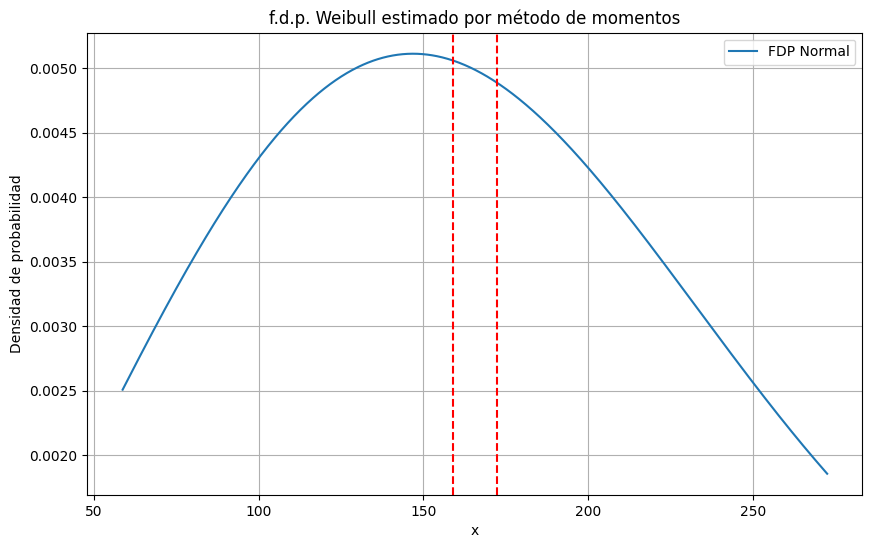

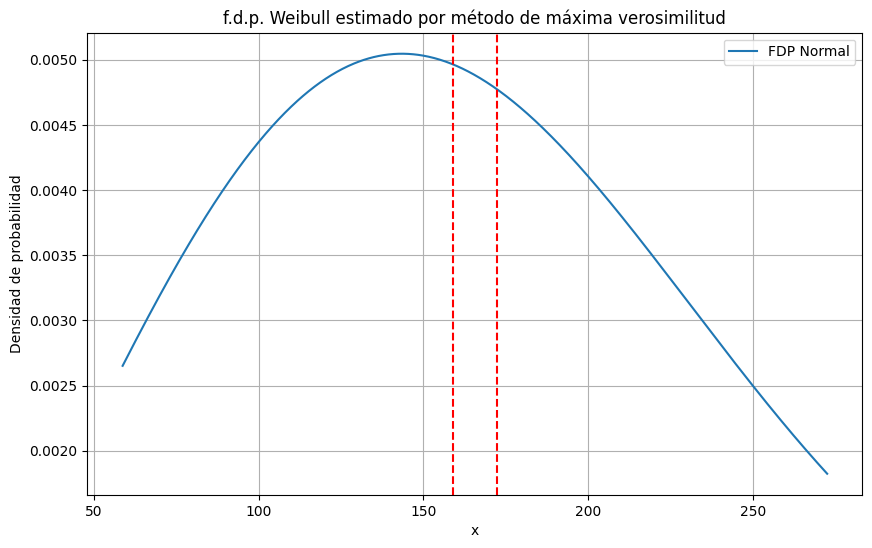

In [ ]:
inferior = artist_data['days_since_album_release'].mean() - t.ppf(1 - 0.025,artist_data['days_since_album_release'].shape[0] - 1)*math.sqrt(artist_data['days_since_album_release'].var(ddof = 1)/artist_data['days_since_album_release'].shape[0])
superior = artist_data['days_since_album_release'].mean() + t.ppf(1 - 0.025,artist_data['days_since_album_release'].shape[0] - 1)*math.sqrt(artist_data['days_since_album_release'].var(ddof = 1)/artist_data['days_since_album_release'].shape[0])
print("IC para la media poblacional: [ " + str(inferior) + " , " + str(superior) + " ]")

# Función de densidad de probabilidad 2
def fdp1(x):
    return (am/(bm**am))*(x**(am-1))*(math.e**(-((x/bm)**am)))
    #return t.pdf(x,artist_data['days_since_album_release'].shape[0] - 1)

def fdp2(x):
    return (av/(bv**av))*(x**(av-1))*(math.e**(-((x/bv)**av)))

# Rango de valores de x

vertical_lines_x = [inferior, superior]  # Puntos en el eje x donde se dibujarán las rectas verticales

x = np.linspace(inferior - 100, superior + 100, 1000)  # Rango de valores de x

# Evaluar las funciones de densidad de probabilidad en el rango de x

# Evaluar las funciones de densidad de probabilidad en el rango de x
y1 = fdp1(x)

plt.figure(figsize=(10, 6))

# Graficar las funciones de densidad de probabilidad
plt.plot(x, y1, label='FDP Normal')

# Dibujar las rectas verticales en los puntos especificados
for xc in vertical_lines_x:
    plt.axvline(x=xc, color='r', linestyle='--')

# Etiquetas y leyenda
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('f.d.p. Weibull estimado por método de momentos')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

# Evaluar las funciones de densidad de probabilidad en el rango de x
y1 = fdp2(x)

plt.figure(figsize=(10, 6))

# Graficar las funciones de densidad de probabilidad
plt.plot(x, y1, label='FDP Normal')

# Dibujar las rectas verticales en los puntos especificados
for xc in vertical_lines_x:
    plt.axvline(x=xc, color='r', linestyle='--')

# Etiquetas y leyenda
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('f.d.p. Weibull estimado por método de máxima verosimilitud')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()



El intervalo de confianza para $\sigma$, con una significancia del 0.05, es:

IC para la varianza poblacional: [ 5060.101073099277 , 6516.985117044905 ]


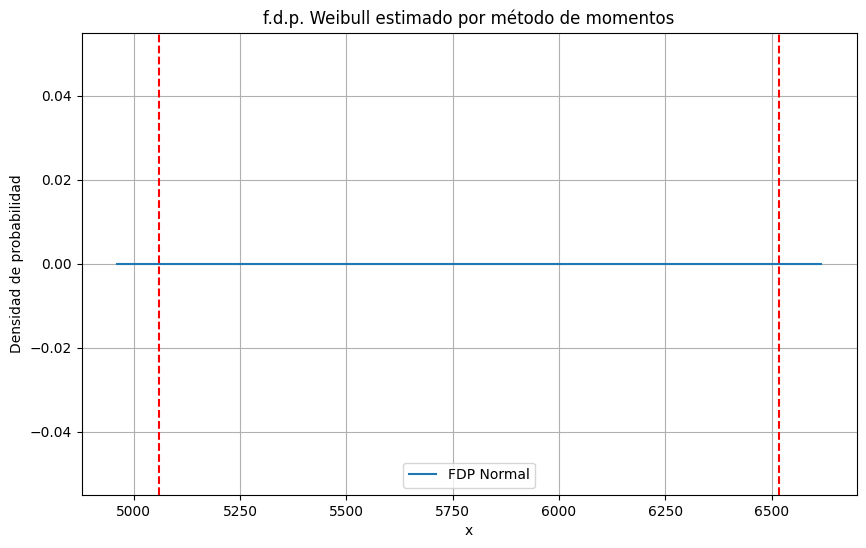

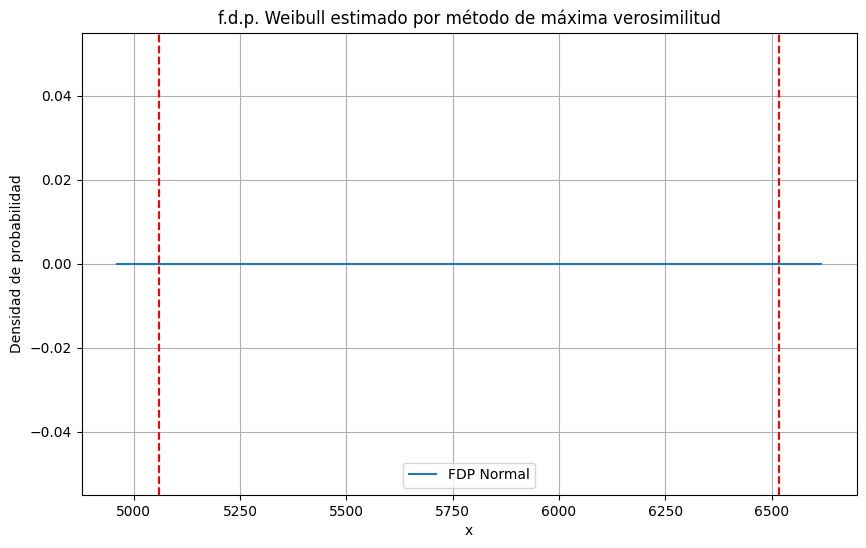

In [ ]:
inferior = (artist_data['days_since_album_release'].shape[0] - 1)*artist_data['days_since_album_release'].var(ddof = 1)/chi2.ppf(1 - 0.025,artist_data['days_since_album_release'].shape[0] - 1)
superior = (artist_data['days_since_album_release'].shape[0] - 1)*artist_data['days_since_album_release'].var(ddof = 1)/chi2.ppf(0.025,artist_data['days_since_album_release'].shape[0] - 1)
print("IC para la varianza poblacional: [ " + str(inferior) + " , " + str(superior) + " ]")

# Función de densidad de probabilidad 2
def fdp1(x):
    return (am/(bm**am))*(x**(am-1))*(math.e**(-((x/bm)**am)))
    #return t.pdf(x,artist_data['days_since_album_release'].shape[0] - 1)

def fdp2(x):
    return (av/(bv**av))*(x**(av-1))*(math.e**(-((x/bv)**av)))

# Rango de valores de x

vertical_lines_x = [inferior, superior]  # Puntos en el eje x donde se dibujarán las rectas verticales

x = np.linspace(inferior - 100, superior + 100, 1000)  # Rango de valores de x

# Evaluar las funciones de densidad de probabilidad en el rango de x

# Evaluar las funciones de densidad de probabilidad en el rango de x
y1 = fdp1(x)

plt.figure(figsize=(10, 6))

# Graficar las funciones de densidad de probabilidad
plt.plot(x, y1, label='FDP Normal')

# Dibujar las rectas verticales en los puntos especificados
for xc in vertical_lines_x:
    plt.axvline(x=xc, color='r', linestyle='--')

# Etiquetas y leyenda
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('f.d.p. Weibull estimado por método de momentos')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

# Evaluar las funciones de densidad de probabilidad en el rango de x
y1 = fdp2(x)

plt.figure(figsize=(10, 6))

# Graficar las funciones de densidad de probabilidad
plt.plot(x, y1, label='FDP Normal')

# Dibujar las rectas verticales en los puntos especificados
for xc in vertical_lines_x:
    plt.axvline(x=xc, color='r', linestyle='--')

# Etiquetas y leyenda
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('f.d.p. Weibull estimado por método de máxima verosimilitud')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

⇒ Podemo concluir que hay compatibilidad entre la estimación puntual (la estimiación del parámetros puntuals es la misma sin importar el método) e intervalar en ambos casos, tanto para la varianza y la media poblacional. Ya que la media poblacional y varianza poblacional calculada utlizando los estimadores puntuales caen en las respectivas estimaciones intervalares.

Por lo que podemos decir que son buenas estimaciones puntuales en el caso de este artista.

Recordar que esto no significa que estas sean la media y la varianza verdadera, sino que hay un 95% de probabilidades de que este en los ICs.

El intervalo más pequeño que podemos construir diminuyendo lo más que podamos el error, para la media (para ambos métodos) es:

In [ ]:
print("[" + str(artist_data['days_since_album_release'].mean()) + "," + str(EM) + "]")

[165.5850622406639,165.5850622406639]


El intervalo más pequeño que podemos construir diminuyendo lo más que podamos el error, para la varianza (para ambos métodos) es:

In [ ]:
print("[" + str(artist_data['days_since_album_release'].var(ddof = 0)) + "+-" + str(VarM - artist_data['days_since_album_release'].var(ddof = 0)) + "]")

[5707.437785162102+-4.547473508864641e-12]


Ahora pasando a las prueba de bondad para ver si la f.d.p. seleccionada es adecuada.

In [ ]:
# Calcular days_since_album_release si aún no lo has hecho
artist_data['days_since_album_release'] = (pd.to_datetime(artist_data['snapshot_date']) - pd.to_datetime(artist_data['album_release_date'])).dt.days

# Obtener lista1 como frecuencias relativas
total_obs = len(artist_data['days_since_album_release'])
value_counts = artist_data['days_since_album_release'].value_counts().sort_index()
lista1 = (value_counts / total_obs).tolist()

#Obtener valor mínimo y máximo de days_since_album_release
min_value = 0
max_value = artist_data['days_since_album_release'].max()

# Generar lista2 con valores uniformemente espaciados
num_points = len(lista1)  # Número de puntos deseado
lista2 = np.linspace(min_value, max_value, num_points)

# Parámetros para la FDP (a y b)
am = 2  # Ejemplo de parámetro 'a'
bm = 10  # Ejemplo de parámetro 'b'

# Evaluar la FDP en lista2
expected = np.array([fdp(x, am, bm) for x in lista2])

# Normalizar expected para que la suma sea aproximadamente 1
expected /= np.sum(expected)

# Ordenar expected de menor a mayor
expected = np.sort(expected).tolist()

print(sum(expected))

# Ajustar las frecuencias esperadas para que coincidan con la suma total de lista1
#expected = [f * sum(lista1) / sum(expected) for f in expected]

# Prueba de chi-cuadrado de bondad de ajuste
chi2, p_value = chisquare(lista1, f_exp=expected)
print("Valor p:", p_value)

1.0
Valor p: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:8064: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:8064: RuntimeWarning: overflow encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


Lo que sugiere que el modelo difiera bastante de lo esperado, puesto que $p < 0.05$.

In [ ]:

artist_data = df[df['main_artist'] == artist_name]
artist_data['days_since_album_release'] = (pd.to_datetime(artist_data['snapshot_date']) - pd.to_datetime(artist_data['album_release_date'])).dt.days
x_vals = np.linspace(0.01, (pd.to_datetime(artist_data['snapshot_date']) - pd.to_datetime(artist_data['album_release_date'])).dt.days.max(), 100)

max = artist_data['days_since_album_release'].max()

porciento_40 = 0.4 * max
porciento_75 = 0.75 * max

print(porciento_40)
print(porciento_75)

127.2
238.5


<ipython-input-4-b2b4b61b9521>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artist_data['days_since_album_release'] = (pd.to_datetime(artist_data['snapshot_date']) - pd.to_datetime(artist_data['album_release_date'])).dt.days


### **Modelamiento para Popularidad**

Para la distribución de la variable $X$ (Popularidad de los artistas) se eligió una distribución beta, es decir $X \sim Beta(α,β)$, por que sus datos estan si o si entre 0 y 100.

Por la tabla de distribuciones obtenemos que:
$$ E[x] = \frac{α}{α + β} $$

$$ V[x] = \frac{αβ}{(α + β)^2 (α + β + 1)} $$

Usando el metodo de los momentos tenemos
$$ media = 0.7767033993548671 = \frac{α}{α + β} $$

$$ varianza = 0.0255319208974203 = \frac{αβ}{(α + β)^2 (α + β + 1)} $$

$$Var[X] = \frac{αβ}{(α + β)^2 (α + β + 1)}$$
$$E[X^2] - E[X]^2 = \frac{αβ}{(α + β)^2 (α + β + 1)}$$
$$E[X^2] = \frac{\alpha}{(\alpha + \beta)} \frac{\alpha + 1}{(\alpha + \beta + 1)}$$

resolviando el sistema nos quedaría:

$$\alpha = \frac{E[X](E[X] - E[X^2])}{E[X^2] - E[X]^2}$$

$$\beta = \frac{E[X](E[X] - E[X^2])}{E[X^2] - E[X]^2} \frac{(1 - E[X])}{E[X]}$$


0.7767033993548671
0.0255319208974203


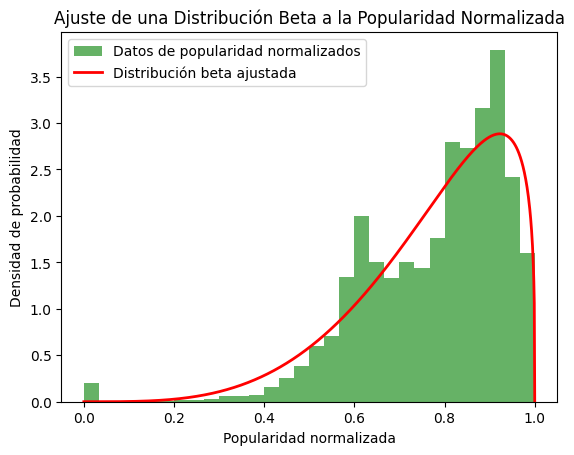

In [ ]:
from scipy.stats import beta
popularity_data = df['popularity']
data_normalized = popularity_data / 100
mean = np.mean(data_normalized)
variance = np.var(data_normalized)

print(mean)
print(variance)


alpha = mean * ((mean * (1 - mean) / variance) - 1)
beta_param = (1 - mean) * ((mean * (1 - mean) / variance) - 1)


# Crear la distribución beta ajustada
beta_dist = beta(alpha, beta_param)

# Valores x para la gráfica de la PDF
x_beta = np.linspace(0, 1, 1000)

# PDF de la distribución beta ajustada
pdf_beta = beta_dist.pdf(x_beta)

# Crear el histograma de los datos normalizados
plt.hist(data_normalized, bins=30, density=True, alpha=0.6, color='g', label='Datos de popularidad normalizados')

# Graficar la PDF de la distribución beta ajustada
plt.plot(x_beta, pdf_beta, 'r-', lw=2, label='Distribución beta ajustada')


# Añadir etiquetas y título
plt.xlabel('Popularidad normalizada')
plt.ylabel('Densidad de probabilidad')
plt.title('Ajuste de una Distribución Beta a la Popularidad Normalizada')
plt.legend()

# Mostrar la gráfica
plt.show()


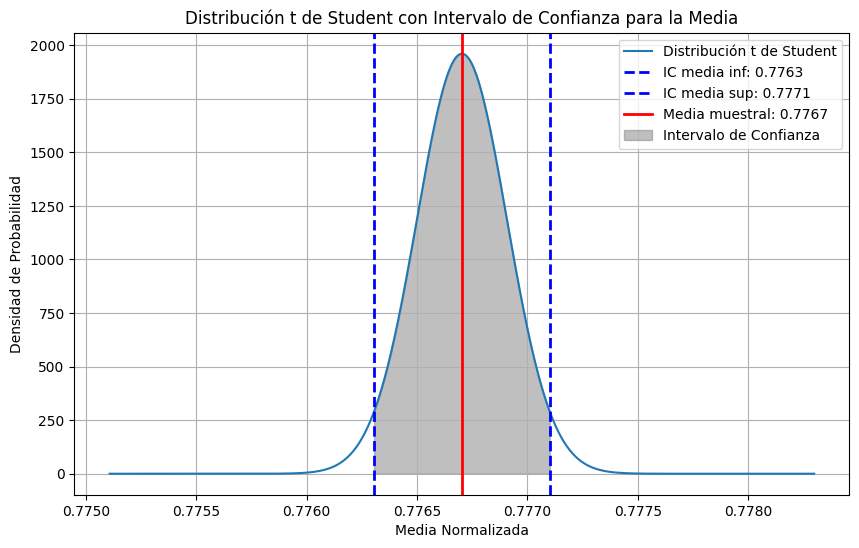

In [ ]:
popularity_data = df['popularity']
data_normalized = popularity_data / 100
mean = np.mean(data_normalized)
variance = np.var(data_normalized, ddof=1)
n = len(data_normalized)

alpha = mean * ((mean * (1 - mean) / variance) - 1)
beta_param = (1 - mean) * ((mean * (1 - mean) / variance) - 1)

# Esperanza y varianza
expected_value = alpha / (alpha + beta_param)
variance_value = (alpha * beta_param) / ((alpha + beta_param)**2 * (alpha + beta_param + 1))

# Intervalo de confianza para la media
confidence_level = 0.95
alpha_confidence = 1 - confidence_level
t_critical = t.ppf(1 - alpha_confidence / 2, n - 1)
margin_of_error = t_critical * (np.std(data_normalized, ddof=1) / np.sqrt(n))
ci_mean = (mean - margin_of_error, mean + margin_of_error)

# Graficar distribución t de Student
x_t = np.linspace(mean - 4 * margin_of_error, mean + 4 * margin_of_error, 1000)
y_t = t.pdf(x_t, df=n-1, loc=mean, scale=np.std(data_normalized, ddof=1) / np.sqrt(n))

plt.figure(figsize=(10, 6))
plt.plot(x_t, y_t, label='Distribución t de Student')
plt.axvline(x=ci_mean[0], color='blue', linestyle='--', lw=2, label=f'IC media inf: {ci_mean[0]:.4f}')
plt.axvline(x=ci_mean[1], color='blue', linestyle='--', lw=2, label=f'IC media sup: {ci_mean[1]:.4f}')
plt.axvline(x=mean, color='red', linestyle='-', lw=2, label=f'Media muestral: {mean:.4f}')
plt.fill_between(x_t, 0, y_t, where=(x_t >= ci_mean[0]) & (x_t <= ci_mean[1]), color='grey', alpha=0.5, label='Intervalo de Confianza')
plt.title('Distribución t de Student con Intervalo de Confianza para la Media')
plt.xlabel('Media Normalizada')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

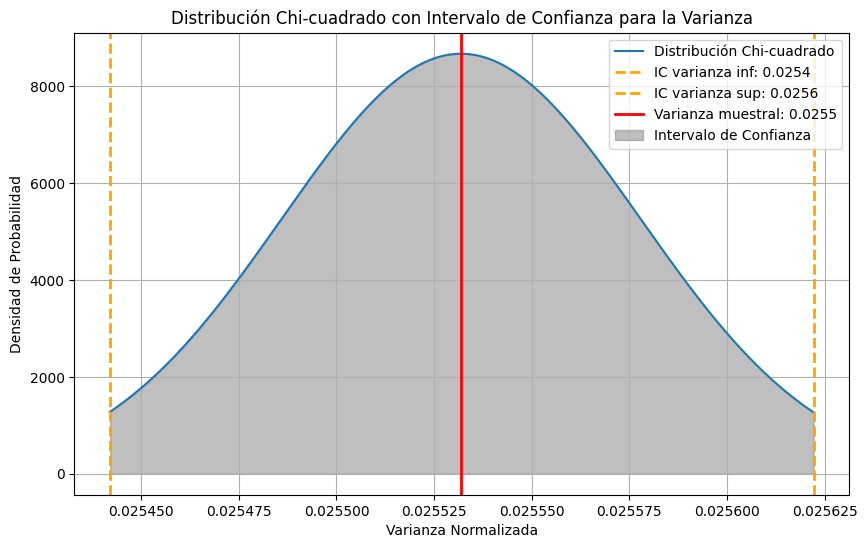

In [ ]:
popularity_data = df['popularity']
data_normalized = popularity_data / 100
mean = np.mean(data_normalized)
variance = np.var(data_normalized, ddof=1)
n = len(data_normalized)

alpha = mean * ((mean * (1 - mean) / variance) - 1)
beta_param = (1 - mean) * ((mean * (1 - mean) / variance) - 1)

# Esperanza y varianza
expected_value = alpha / (alpha + beta_param)
variance_value = (alpha * beta_param) / ((alpha + beta_param)**2 * (alpha + beta_param + 1))

# Intervalo de confianza para la varianza
chi2_lower = chi2.ppf(alpha_confidence / 2, n - 1)
chi2_upper = chi2.ppf(1 - alpha_confidence / 2, n - 1)
ci_variance = ((n - 1) * variance / chi2_upper, (n - 1) * variance / chi2_lower)

# Graficar distribución chi-cuadrado
x_chi2 = np.linspace(chi2_lower * variance / (n - 1), chi2_upper * variance / (n - 1), 1000)
y_chi2 = chi2.pdf(x_chi2 * (n - 1) / variance, df=n-1) * (n - 1) / variance

plt.figure(figsize=(10, 6))
plt.plot(x_chi2, y_chi2, label='Distribución Chi-cuadrado')
plt.axvline(x=ci_variance[0], color='orange', linestyle='--', lw=2, label=f'IC varianza inf: {ci_variance[0]:.4f}')
plt.axvline(x=ci_variance[1], color='orange', linestyle='--', lw=2, label=f'IC varianza sup: {ci_variance[1]:.4f}')
plt.axvline(x=variance, color='red', linestyle='-', lw=2, label=f'Varianza muestral: {variance:.4f}')
plt.fill_between(x_chi2, 0, y_chi2, where=(x_chi2 >= ci_variance[0]) & (x_chi2 <= ci_variance[1]), color='grey', alpha=0.5, label='Intervalo de Confianza')
plt.title('Distribución Chi-cuadrado con Intervalo de Confianza para la Varianza')
plt.xlabel('Varianza Normalizada')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

#### **Prueba de Bondad**

- H0: La media muestral es igual a la media poblacional hipotética.
- H1: La media muestral es diferente a la media poblacional hipotética.

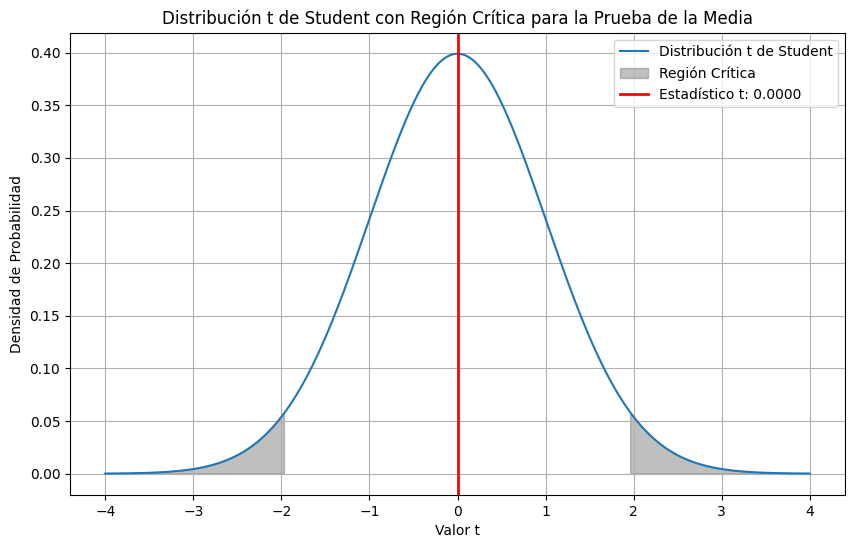

Estadístico t: 2.3918641995801574e-08
Valor p para la prueba t: 0.9999999809156925
No rechazamos la hipótesis nula: No hay evidencia suficiente para decir que la media muestral es diferente a la media poblacional hipotética.


In [ ]:
popularity_data = df['popularity']
data_normalized = popularity_data / 100
mean = np.mean(data_normalized)
variance = np.var(data_normalized, ddof=1)
n = len(data_normalized)

# Media poblacional hipotética
mu_hipotetica = 0.7767033993548671

# Calcular el estadístico t
t_statistic = (mean - mu_hipotetica) / (np.std(data_normalized, ddof=1) / np.sqrt(n))

# Calcular el valor p
p_value_t = 2 * (1 - t.cdf(np.abs(t_statistic), df=n-1))

confidence_level = 0.95
alpha_confidence = 1 - confidence_level
t_critical = t.ppf(1 - alpha_confidence / 2, df=n-1)

# Gráfico
x_t = np.linspace(-4, 4, 1000)
y_t = t.pdf(x_t, df=n-1)

plt.figure(figsize=(10, 6))
plt.plot(x_t, y_t, label='Distribución t de Student')
plt.fill_between(x_t, 0, y_t, where=(x_t <= -t_critical) | (x_t >= t_critical), color='grey', alpha=0.5, label='Región Crítica')
plt.axvline(x=t_statistic, color='red', linestyle='-', lw=2, label=f'Estadístico t: {t_statistic:.4f}')
plt.title('Distribución t de Student con Región Crítica para la Prueba de la Media')
plt.xlabel('Valor t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Estadístico t: {t_statistic}")
print(f"Valor p para la prueba t: {p_value_t}")

# Resultado de la prueba
if p_value_t < alpha_confidence:
    print("Rechazamos la hipótesis nula: La media muestral es diferente a la media poblacional hipotética.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para decir que la media muestral es diferente a la media poblacional hipotética.")

- H0: La varianza muestral es igual a la varianza poblacional hipotética.
- H1: La varianza muestral es diferente a la varianza poblacional hipotética.

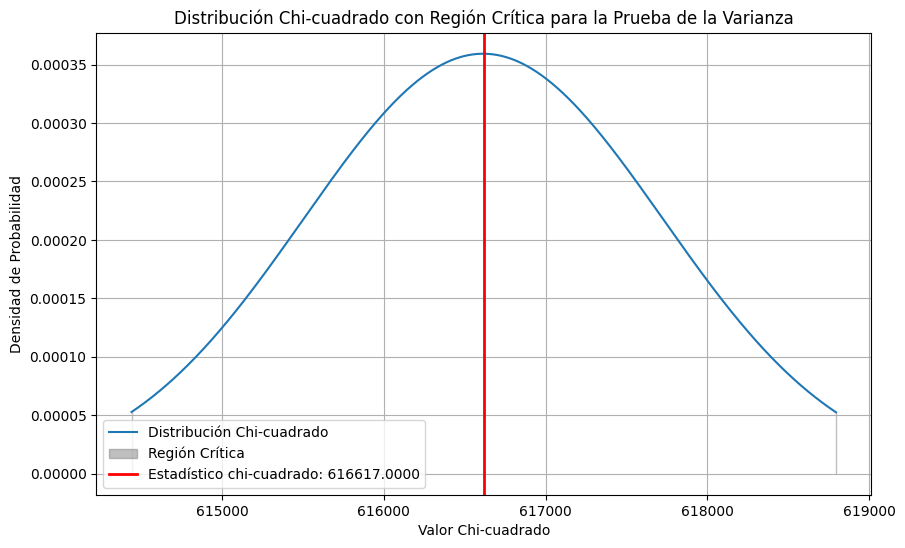

Estadístico chi-cuadrado: 616617.0
Valor p para la prueba chi-cuadrado: 0.9988025259668896
No rechazamos la hipótesis nula: No hay evidencia suficiente para decir que la varianza muestral es diferente a la varianza poblacional hipotética.


In [ ]:
popularity_data = df['popularity']
data_normalized = popularity_data / 100
mean = np.mean(data_normalized)
variance = np.var(data_normalized, ddof=1)
n = len(data_normalized)

# Varianza poblacional hipotética
sigma2_hipotetica = 0.0255319208974203

# Calcular el estadístico chi-cuadrado
chi2_statistic = (n - 1) * variance / sigma2_hipotetica

# Calcular el valor p
p_value_chi2 = 2 * (1 - chi2.cdf(np.abs(chi2_statistic), df=n-1))

# Nivel de confianza
chi2_lower = chi2.ppf(alpha_confidence / 2, df=n-1)
chi2_upper = chi2.ppf(1 - alpha_confidence / 2, df=n-1)

# Gráfico
x_chi2 = np.linspace(chi2_lower, chi2_upper, 1000)
y_chi2 = chi2.pdf(x_chi2, df=n-1)

plt.figure(figsize=(10, 6))
plt.plot(x_chi2, y_chi2, label='Distribución Chi-cuadrado')
plt.fill_between(x_chi2, 0, y_chi2, where=(x_chi2 <= chi2_lower) | (x_chi2 >= chi2_upper), color='grey', alpha=0.5, label='Región Crítica')
plt.axvline(x=chi2_statistic, color='red', linestyle='-', lw=2, label=f'Estadístico chi-cuadrado: {chi2_statistic:.4f}')
plt.title('Distribución Chi-cuadrado con Región Crítica para la Prueba de la Varianza')
plt.xlabel('Valor Chi-cuadrado')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Estadístico chi-cuadrado: {chi2_statistic}")
print(f"Valor p para la prueba chi-cuadrado: {p_value_chi2}")

# Resultado de la prueba
if p_value_chi2 < alpha_confidence:
    print("Rechazamos la hipótesis nula: La varianza muestral es diferente a la varianza poblacional hipotética.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para decir que la varianza muestral es diferente a la varianza poblacional hipotética.")

###Punto 3.

#### **Test de hipótesis**
Se trabajara con la variable de energy, la cual sera separada entre albumes con contenido explicito y sin contenido explicito y nuestras hipótesis seran las siguientes:

$$H_0: {\bar{X}_1 - \bar{X}_2} = 0$$


$$H_1: {\bar{X}_1 - \bar{X}_2} \neq 0$$

Se trabajara con significancia de 5% y:



*   Los supuestos seran: como se trabajará con todos los datos, se asume que la muestra es la población y por ende la varianza es conocida.
*   El caso a tratar sera el de **test para 2 medias con varianza conocida** donde el estadístico a utilizar es:

$$z = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}$$
Donde la hipótesis sera rechazada cuando $$z\leq Z_{1-\frac{α}{2}}$$

In [ ]:
# Filtrar los datos según el contenido explícito
explicit = df[df['is_explicit'] == 1]['energy']
non_explicit = df[df['is_explicit'] == 0]['energy']

# Calcular las estadísticas descriptivas
mean_explicit = np.mean(explicit)
mean_non_explicit = np.mean(non_explicit)
var_explicit = np.var(explicit, ddof=1)
var_non_explicit = np.var(non_explicit, ddof=1)
n_explicit = len(explicit)
n_non_explicit = len(non_explicit)

# Contraste de hipótesis para dos medias con varianzas conocidas (se asumen las varianzas muestrales varianzas poblacionales)
z = (mean_explicit - mean_non_explicit) / (((var_explicit / n_explicit) + (var_non_explicit / n_non_explicit)) ** 0.5)

# Calcular el p-valor
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Nivel de significación
alpha = 0.05

z_value = stats.norm.ppf(1 - alpha / 2)

reject_null = z < z_value

# Imprimimos los resultados
print(f"Estadístico Z: {z}")
print(f"P-valor: {p_value}")
print(f"Rechazamos la hipótesis nula: {reject_null}")



Estadístico Z: 134.01185713447214
P-valor: 0.0
Rechazamos la hipótesis nula: False


Se obtiene que $$Z_{1-\frac{α}{2}}\leq z$$
lo que nos da suficiente evidencia para rechazar H0 y aceptar H1.

Si lo que decidieramos fuera incorrecto, estariamos cometiendo un error del tipo II, ya que no rechazariamos H0 al ser falsa.


Al trabajar con varianzas desconocidas, se puede utilizar la distribución t-Student para tratar con esta incertidumbre, pero tiene las desventaja que los valores del intervalo pueden ser algo mas imprecisos que los valores cuando las varianzas son conocidas

### Punto 4
Regresion lineal de loudness X energy calculada a travez del metodo visto en clases y con herramientas de la biblioteca "statsmodels.api"

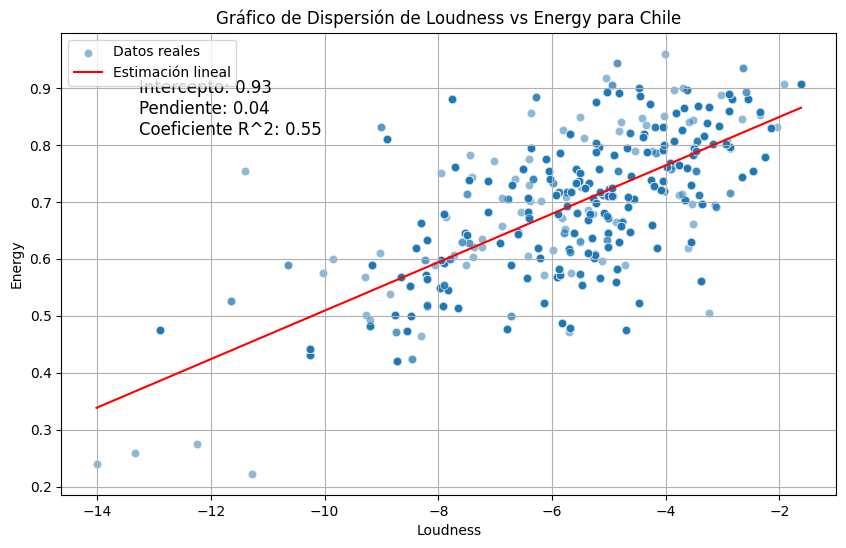

In [ ]:
subset = df[df['country'] == 'Chile']

X = subset['loudness']
Y = subset['energy']
nx = len(X)
ny = len(Y)



promedio_X = X.mean()
promedio_Y = Y.mean()

Sxx = sum(X**2) - nx * (promedio_X ** 2)

Sxy = sum((X-promedio_X) * (Y-promedio_Y))

a_esti = Sxy/Sxx
b_esti = promedio_Y - a_esti * promedio_X

Y_esti = a_esti * X + b_esti

plt.figure(figsize=(10, 6))
sns.scatterplot(x='loudness', y='energy', data=subset, alpha=0.5, label='Datos reales')
sns.lineplot(x=X, y=Y_esti, color='red', label='Estimación lineal')
plt.title('Gráfico de Dispersión de Loudness vs Energy para Chile')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.grid(True)
plt.legend()
plt.text(0.1, 0.9, f'Intercepto: {intercept:.2f}\nPendiente: {slope:.2f}\nCoeficiente R^2: {r_squared:.2f}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()






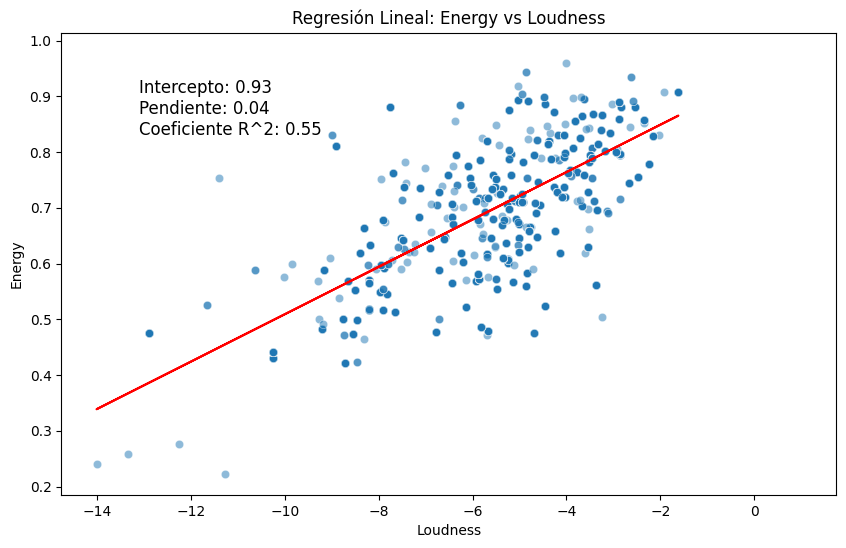

In [ ]:
subset = df[df['country'] == 'Chile']

# Realizar regresión lineal simple
X = subset['loudness']
Y = subset['energy']


# Agregar una constante (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo
model = sm.OLS(Y, X).fit()

# Obtener los parámetros del modelo
intercept, slope = model.params
r_squared = model.rsquared

# Gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loudness', y='energy', data=subset, alpha=0.5)
plt.plot(X, intercept + slope * X, color='red')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Regresión Lineal: Energy vs Loudness')
plt.text(0.1, 0.9, f'Intercepto: {intercept:.2f}\nPendiente: {slope:.2f}\nCoeficiente R^2: {r_squared:.2f}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()

####Intervalo de confianza para a, con la distribucion normal del estimador de a, bajo supuesto de desviacion estandar de errores conocida

Estimador de a: 0.042478192199683386


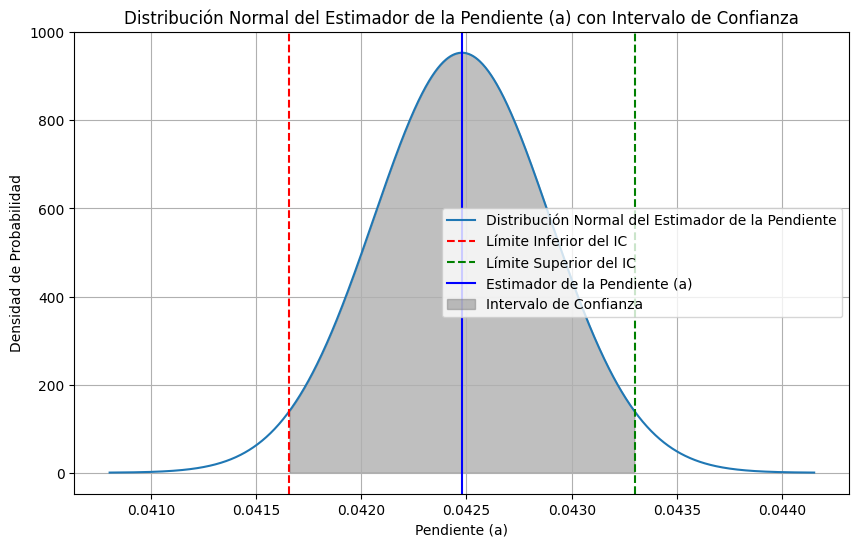

In [ ]:
subset = df[df['country'] == 'Chile']
X = subset['loudness']
Y = subset['energy']
nx = len(X)
ny = len(Y)

promedio_X = X.mean()
promedio_Y = Y.mean()

Sxx = sum(X**2) - nx * (promedio_X ** 2)
Sxy = sum((X-promedio_X) * (Y-promedio_Y))

a_esti = Sxy / Sxx
b_esti = promedio_Y - a_esti * promedio_X

Y_esti = a_esti * X + b_esti

residuos = Y - Y_esti
varianza_residuos = sum(residuos**2) / (nx - 2)
sigma = np.sqrt(varianza_residuos)



confianza = 0.95
Z = 1.96 # Calculado con tabla de distribucion normal


intervalo_confianza_a_esti = (a_esti - Z * sigma / np.sqrt(Sxx), a_esti + Z * sigma / np.sqrt(Sxx))

# Visualización
x = np.linspace(a_esti - 4 * sigma / np.sqrt(Sxx), a_esti + 4 * sigma / np.sqrt(Sxx), 1000)
y = stats.norm.pdf(x, a_esti, sigma / np.sqrt(Sxx))

print(f"Estimador de a: {a_esti}")



plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribución Normal del Estimador de la Pendiente')
plt.axvline(x=intervalo_confianza_a_esti[0], color='red', linestyle='--', label='Límite Inferior del IC')
plt.axvline(x=intervalo_confianza_a_esti[1], color='green', linestyle='--', label='Límite Superior del IC')
plt.axvline(x=a_esti, color='blue', linestyle='-', label='Estimador de la Pendiente (a)')
plt.fill_between(x, 0, y, where=(x >= intervalo_confianza_a_esti[0]) & (x <= intervalo_confianza_a_esti[1]), color='grey', alpha=0.5, label='Intervalo de Confianza')
plt.title('Distribución Normal de la Pendiente (a) con Intervalo de Confianza')
plt.xlabel('Pendiente (a)')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

Al realizar un intervalo de confianza del estimador de a nos da que este en 0.04 lo que nos